In [1]:
library(dplyr, warn.conflicts = F)
if(!dir.exists("./data")){
    dir.create("./data")
}
dataset_archive <- "./data/dataset.zip"
if(!file.exists(dataset_archive)){
    download.file(url="https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip", destfile = dataset_archive)
    unzip(zipfile = dataset_archive, exdir = "./data/")
}
NEI <- readRDS("./data/summarySCC_PM25.rds")

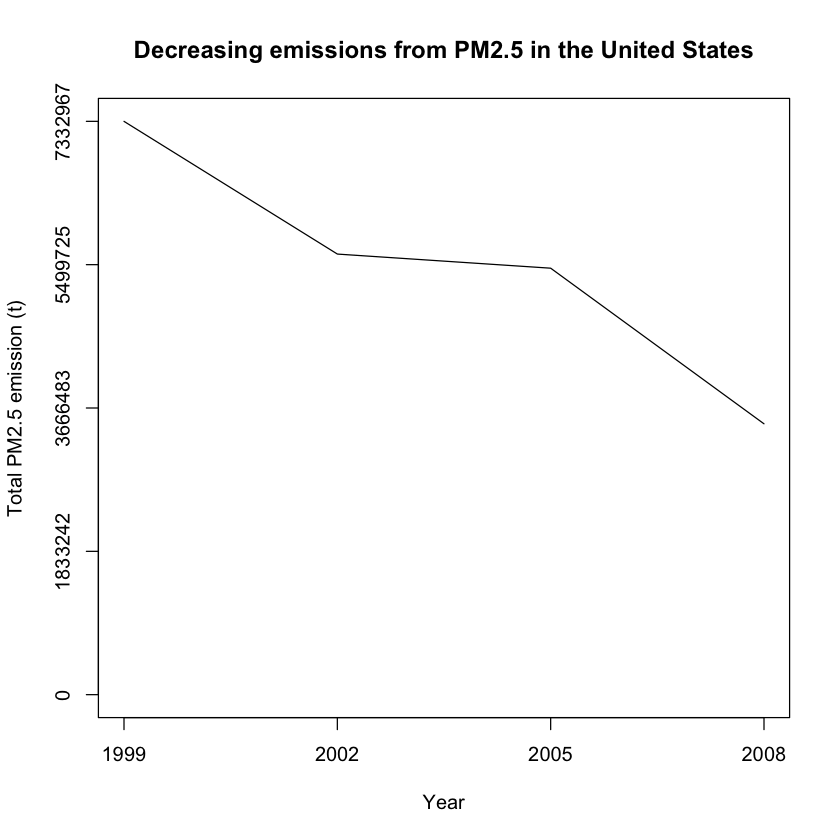

In [2]:
NEI <- readRDS("./data/summarySCC_PM25.rds")
emission_by_year <- summarise(group_by(NEI, year), sum=sum(Emissions, na.rm=T))
plot(emission_by_year, ylab="Total PM2.5 emission (t)", xlab="Year", ylim=range(0, max(emission_by_year$sum)), type="l", pch=20, yaxt='n', xaxt = 'n')
axis(side = 1, at = emission_by_year$year)
axis(side = 2, at = seq(0, max(emission_by_year$sum), length.out=5))
title(main = "Decreasing emissions from PM2.5 in the United States")

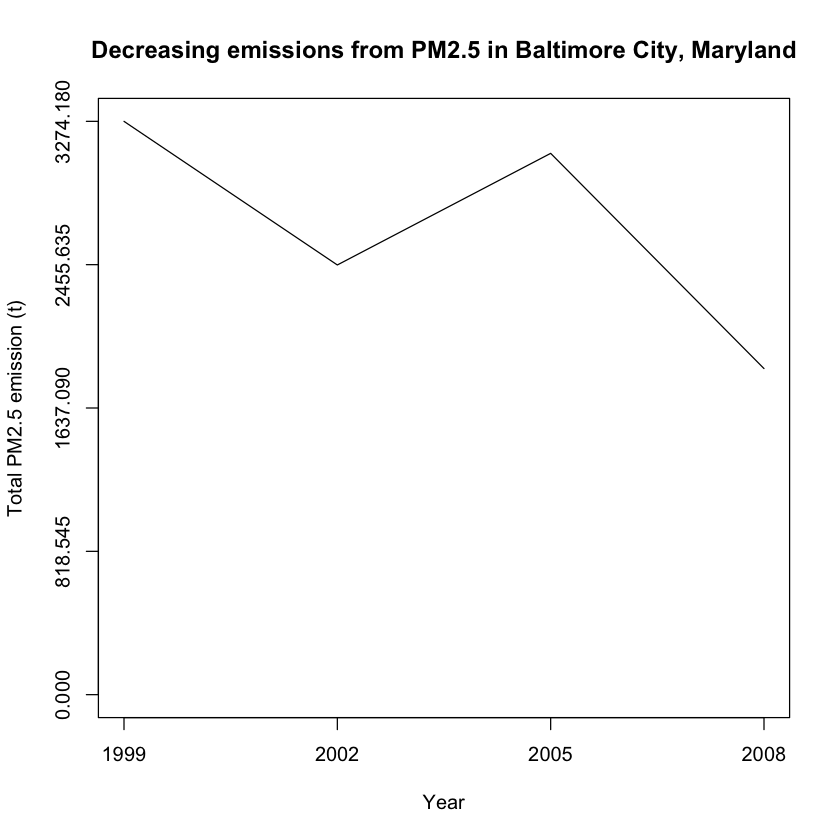

In [3]:
NEI <- readRDS("./data/summarySCC_PM25.rds")
bcNEI <- subset(NEI, fips=="24510")
emission_by_year <- summarise(group_by(bcNEI, year), sum=sum(Emissions, na.rm=T))
plot(emission_by_year, ylab="Total PM2.5 emission (t)", xlab="Year", ylim=range(0, max(emission_by_year$sum)), type="l", pch=20, yaxt='n', xaxt = 'n')
axis(side = 1, at = emission_by_year$year)
axis(side = 2, at = seq(0, max(emission_by_year$sum), length.out=5))
title(main = "Decreasing emissions from PM2.5 in Baltimore City, Maryland")

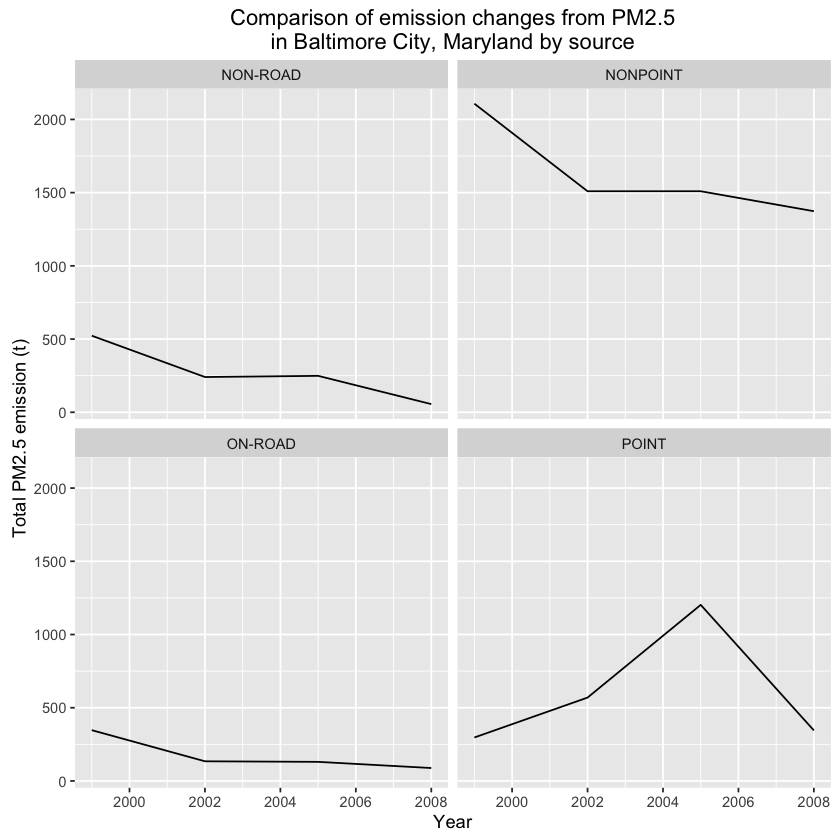

In [4]:
library(ggplot2)
emissions <- group_by_(bcNEI,  .dots=c("year", "type")) %>% summarise(total_emission=sum(Emissions, na.rm=T))
qplot(year, total_emission, data=emissions, geom="line")+ 
  facet_wrap(~type, nrow=2) + 
  ggtitle("Comparison of emission changes from PM2.5\nin Baltimore City, Maryland by source") +
  ylab("Total PM2.5 emission (t)") +
  xlab("Year")

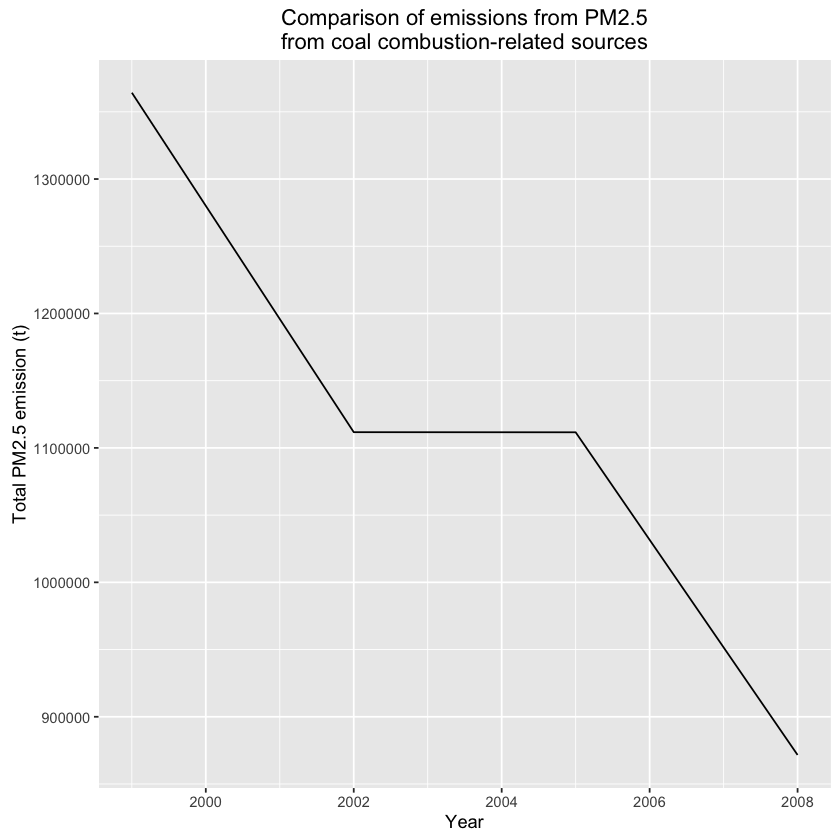

In [5]:
SCC <- data.frame(readRDS("./data/Source_Classification_Code.rds"))
combustionSCC <- SCC[grep("Combustion", SCC$SCC.Level.One),]
combustionNEI <- merge(NEI, combustionSCC, by.x="SCC", by.y="SCC")
emissions <- group_by_(combustionNEI,  .dots=c("year")) %>% summarise(total_emission=sum(Emissions, na.rm=T))
qplot(year, total_emission, data=emissions, geom=c("line")) +
  ggtitle("Comparison of emissions from PM2.5\nfrom coal combustion-related sources") +
  ylab("Total PM2.5 emission (t)") +
  xlab("Year")

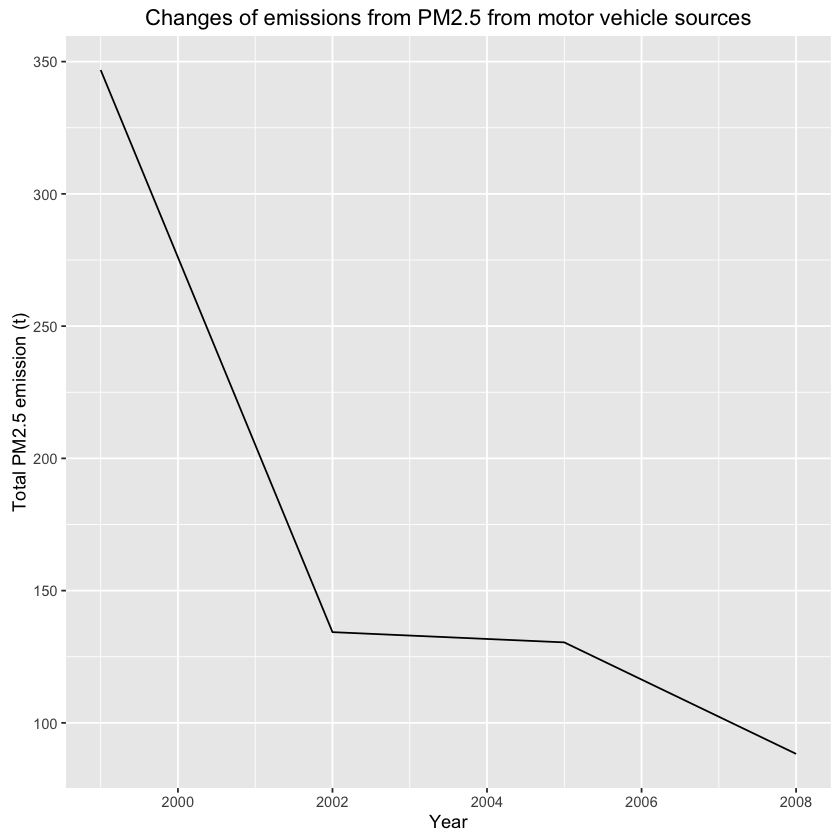

In [6]:
bcMotorNEI <- subset(bcNEI, type=="ON-ROAD")
emissions <- group_by_(bcMotorNEI, .dots=c("year")) %>% summarise(total_emission=sum(Emissions, na.rm=T))
qplot(year, total_emission, data=emissions, geom="line") +
  ggtitle("Changes of emissions from PM2.5 from motor vehicle sources") +
  ylab("Total PM2.5 emission (t)") +
  xlab("Year")

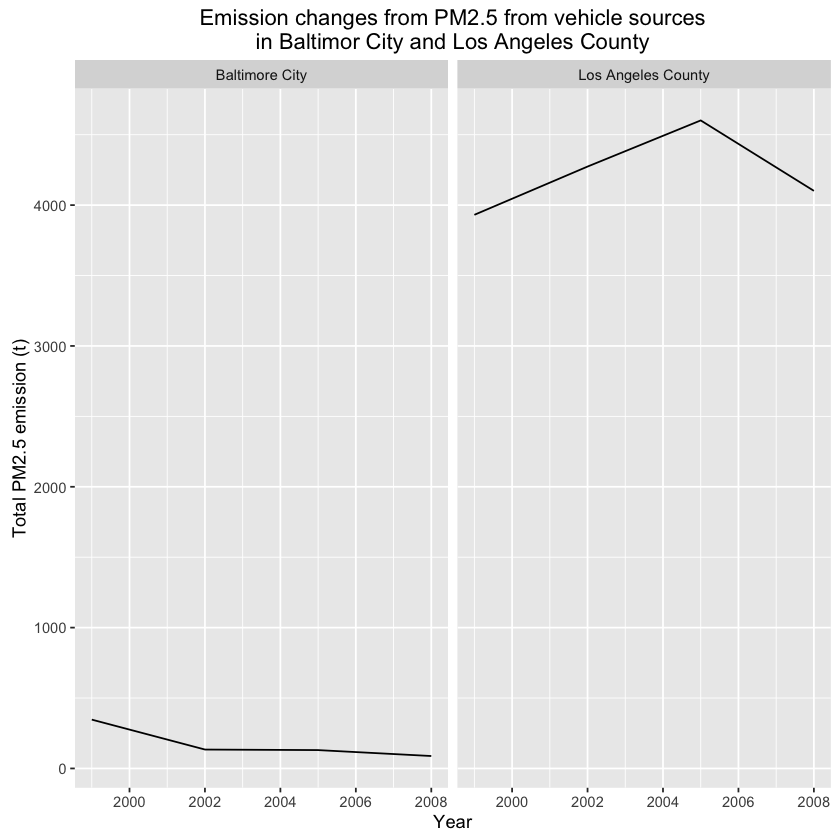

In [7]:
motorNEI <- subset(NEI, type=="ON-ROAD")
motorNEI <- subset(motorNEI, fips=="24510" | fips=="06037")

nameByFIPS <- function(fips){
    if(fips == "24510"){
        "Baltimore City"
    }else{
        "Los Angeles County"
    }
}

motorNEI$geoName <- sapply(motorNEI$fips, nameByFIPS)
emissions <- group_by_(motorNEI,  .dots=c("year", "geoName")) %>% summarise(total_emission=sum(Emissions, na.rm=T))
qplot(year, total_emission, data=emissions, geom=c("line")) + 
  facet_wrap(~geoName, nrow=1) +
  ggtitle("Emission changes from PM2.5 from vehicle sources\nin Baltimor City and Los Angeles County") +
  ylab("Total PM2.5 emission (t)") +
  xlab("Year")